In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
%matplotlib inline

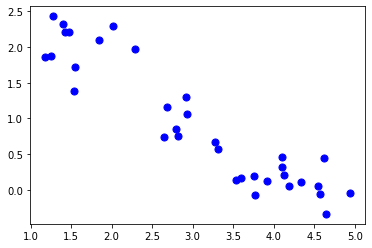

In [2]:
df = pd.read_csv('non_linear.csv')
df = df[(df.x_train >1) & (df.x_train <5)].copy()

plt.scatter(df.x_train, df.y_train, 50, 'b', 'o')
plt.show()

The "small steps" by which we move to the optimal solution looks like:

$$
w^{k+1} = w^k - \eta\nabla L(w)
$$

$\eta$ - step of gradient descent

$\nabla L(w)$  - vector gradient of function


Algoritm of gradient deascent:

1. Starting the algorithm at a random point $w^0$
2. Calculate the direction of the antigradient $-f'(x^0)$


$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = 2\cdot(-1)\cdot1\cdot (y_1 - (w_0x_0^1 + \ldots+w_mx_m^1)) &\\
\frac{\partial L}{\partial w_k} = 2\cdot(-1)\cdot x_1^1 \cdot (y_1 - (w_0x_0^1 + \ldots+w_mx_m^1)) &  k\neq 0\\
\end{array}
\right.
$$

3. Moving in the direction of the next gradient point $w^1 = w^0 - \eta f'(w^0)$
4. Repeating steps 2 and 3 until we reach optimal decision

In [3]:
def gradient(X, y, w): # calculating the gradient
    n = X.shape[0] # counting the number of elements in the training set
    y_pred = X.dot(w.T) # find the predicted values
    error = y - y_pred # calculatin the error
    grad = np.multiply(X, error).sum(axis=0)*(-1.0)*2.0/n 
    # we calculate the gradient (by the formula above 
    # we multiply each of the coordinates by the error)
    # and also add the regularization coefficient alpha multiplied by the vector of weights
    return grad, error

In [4]:
def gradient_step(X, y, w_current, eta): #function that makes a step of gradient descent
    grad, error = gradient (X, y, w_current) # counting the error and gradient
    w_next = w_current - eta * grad #then we make a step of gradient descent
    weight_evolution = distance.euclidean(w_current, w_next) # checking the Euclidean distance between the vectors
    return (w_next, weight_evolution, grad)

In [5]:
def gradient_descent(X, y, eta=0.01, epsilon=0.0001):
    m = X.shape[1] # counting the number of features for the weight vector
    w = np.random.random(m).reshape(1, -1) # creating a vector of weights with random values
    w_next, weight_evolution, grad = gradient_step(X, y, w, eta) # making the first step of gradient descent
    step = 0
    while weight_evolution > epsilon: # repeat until the weight vector converges
        w = w_next
        w_next, weight_evolution, grad = gradient_step(X, y, w, eta) # making another step
        step += 1
        if step % 100 ==0: # on each hundredth descent, we output the values of the change in the weight vector and the gradient
            print(f'Step: {step} |w - w_next|= {weight_evolution}, gradient: {grad}')
    print (f'total steps {step}')
    return w

In [6]:
X = np.c_[np.ones(df.shape[0]), df.x_train.values]
y = df.y_train.values.reshape(-1,1)

In [7]:
w = gradient_descent(X, y, eta=0.01, epsilon=0.001)
w

Step: 100 |w - w_next|= 0.004284808813521439, gradient: [-0.41164862  0.1189171 ]
Step: 200 |w - w_next|= 0.0033581995629489076, gradient: [-0.32262775  0.09320074]
Step: 300 |w - w_next|= 0.0026319737461803086, gradient: [-0.25285804  0.07304566]
Step: 400 |w - w_next|= 0.0020627975409834264, gradient: [-0.19817635  0.05724921]
Step: 500 |w - w_next|= 0.001616708259822747, gradient: [-0.15531982  0.04486881]
Step: 600 |w - w_next|= 0.001267087799675153, gradient: [-0.12173121  0.03516572]
total steps 698


array([[ 2.5842448 , -0.56303895]])

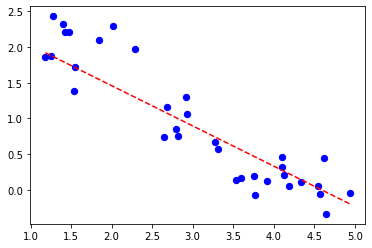

In [8]:
plt.scatter(df.x_train, df.y_train, 40, 'b', 'o')

x_linspace = np.linspace(df.x_train.min(), df.x_train.max(), num=100)
y_pred = np.c_[np.ones(x_linspace.shape[0]).reshape(-1,1), x_linspace.reshape(-1,1)].dot(w.T)

plt.plot(x_linspace, y_pred, '--', color='red')
plt.show()

## Regularization

We need to add $alpha$ parametr

In [9]:
def gradient_l2(X, y, w, alpha): # calculating the gradient
    n = X.shape[0] # counting the number of elements in the training set
    y_pred = X.dot(w.T) # find the predicted values
    error = y - y_pred # calculatin the error
    grad = np.multiply(X, error).sum(axis=0)*(-1.0)*2.0/n +(alpha*w*2.0)
    # we calculate the gradient (by the formula above 
    # we multiply each of the coordinates by the error)
    # and also add the regularization coefficient alpha multiplied by the vector of weights
    return grad, error

def gradient_step_l2(X, y, w_current, eta, alpha): #function that makes a step of gradient descent
    grad, error = gradient_l2 (X, y, w_current, alpha) # counting the error and gradient
    w_next = w_current - eta * grad #then we make a step of gradient descent
    weight_evolution = distance.euclidean(w_current, w_next) # checking the Euclidean distance between the vectors
    return (w_next, weight_evolution, grad)

def gradient_descent_l2(X, y, eta=0.01, epsilon=0.0001, alpha=0.0):
    m = X.shape[1] # counting the number of features for the weight vector
    w = np.random.random(m).reshape(1, -1) # creating a vector of weights with random values
    w_next, weight_evolution, grad = gradient_step_l2(X, y, w, eta, alpha) # making the first step of gradient descent
    step = 0
    while weight_evolution > epsilon: # repeat until the weight vector converges
        w = w_next
        w_next, weight_evolution, grad = gradient_step_l2(X, y, w, eta, alpha) # making another step
        step += 1
        if step % 100 ==0: # on each hundredth descent, we output the values of the change in the weight vector and the gradient
            print(f'Step: {step} |w - w_next|= {weight_evolution}, gradient: {grad}')
    print (f'total steps {step}')
    return w

In [10]:
w_l = gradient_descent_l2(X, y, eta=0.01, epsilon=0.001, alpha=0.05)
w_l

Step: 100 |w - w_next|= 0.004815678208479104, gradient: [[-0.46265012  0.13365042]]
Step: 200 |w - w_next|= 0.0034140924211309635, gradient: [[-0.32799747  0.09475194]]
Step: 300 |w - w_next|= 0.002420433126013429, gradient: [[-0.23253499  0.06717473]]
Step: 400 |w - w_next|= 0.0017159747876898041, gradient: [[-0.16485652  0.04762377]]
Step: 500 |w - w_next|= 0.0012165465099367575, gradient: [[-0.11687562  0.03376304]]
total steps 557


array([[ 1.84511119, -0.35031061]])

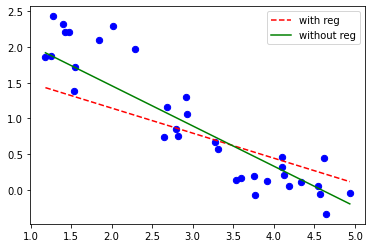

In [11]:
plt.scatter(df.x_train, df.y_train, 40, 'b', 'o')

x_linspace = np.linspace(df.x_train.min(), df.x_train.max(), num=100)
y_pred_l = np.c_[np.ones(x_linspace.shape[0]).reshape(-1,1), x_linspace.reshape(-1,1)].dot(w_l.T)

plt.plot(x_linspace, y_pred_l, '--', color='red', label='with reg')
plt.plot(x_linspace, y_pred, '-', color='green', label='without reg')
plt.legend(loc='upper right')
plt.show()